## Setup and Imports

In [1]:
import sys
import matplotlib.pyplot as plt
from importlib import reload

from tfmplayground.priors.experiments import utils

# add parent directory to path for imports
sys.path.append('..')

import data_analysis
from regression import plots

# reload modules to pick up any changes
reload(data_analysis)
reload(utils)
reload(plots)

from analyzer import RegressionDataAnalyzer
from tfmplayground.priors.experiments.utils import load_multiple_analyzers
from regression.plots import (
    plot_function_samples,
    plot_2d_heatmap,
    plot_single_prior_overview,
    plot_target_distributions,
    plot_feature_distributions,
    plot_correlations,
    plot_mutual_info,
    plot_complexity_noise,
    plot_redundancy,
    plot_prior_similarity,
)

%matplotlib inline
plt.rcParams['figure.dpi'] = 100

/opt/homebrew/Caskroom/miniconda/base/envs/tfm-playground/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

Specify the directory containing your regression prior HDF5 files.

In [2]:
# Configure data directory
DATA_DIR = './results/data'  # Adjust this path as needed

# Auto-discover and load all regression analyzers
analyzers = load_multiple_analyzers(DATA_DIR, RegressionDataAnalyzer, verbose=True)

print(f"\nLoaded {len(analyzers)} regression prior(s):")
for prior_name in analyzers.keys():
    print(f"  - {prior_name}")

Scanning ./results/data for prior data files...
   Found 5 prior(s): ['tabpfn_prior_bag', 'tabpfn_gp', 'tabpfn_mlp', 'ticl_mlp', 'ticl_gp']

 Loading analyzers...
Loading data from results/data/prior_tabpfn_prior_bag_100x8_100x10.h5...
  Loaded 800 samples
  Problem type: regression
   [OK] tabpfn_prior_bag
Loading data from results/data/prior_tabpfn_gp_100x8_100x10.h5...
  Loaded 800 samples
  Problem type: regression
   [OK] tabpfn_gp
Loading data from results/data/prior_tabpfn_mlp_100x8_100x10.h5...
  Loaded 800 samples
  Problem type: regression
   [OK] tabpfn_mlp
Loading data from results/data/prior_ticl_mlp_100x8_1024x100.h5...
  Loaded 800 samples
  Problem type: regression
   [OK] ticl_mlp
Loading data from results/data/prior_ticl_gp_100x8_100x10.h5...
  Loaded 800 samples
  Problem type: regression
   [OK] ticl_gp

[OK] Loaded 5/5 prior(s)

Loaded 5 regression prior(s):
  - tabpfn_prior_bag
  - tabpfn_gp
  - tabpfn_mlp
  - ticl_mlp
  - ticl_gp


---

# Part 1: Individual Prior Sample Visualizations

Visualize what the data from each regression prior looks like.

## 1.1 Target Distributions and Feature Correlations

**What you're looking at:**

- **Left plot (Violin)**: Shows the distribution of target values across 5 different samples. Each violin represents one sample - wider sections mean more data points have that target value. The horizontal lines show the mean (center) and median.- Diagonal is always 1 (perfect self-correlation)

- **Right plot (Correlation Heatmap)**: Shows how the first 10 features correlate with each other and with the target. Dark red = strong positive correlation (close to 1), dark blue = strong negative correlation (close to -1), white = no correlation.- In the heatmap, look at the bottom row (Target) to see which features are most predictive

- Compare the width and range of violins between priors - wider/taller violins mean more variance in targets
**What to look for:**


Prior: tabpfn_prior_bag


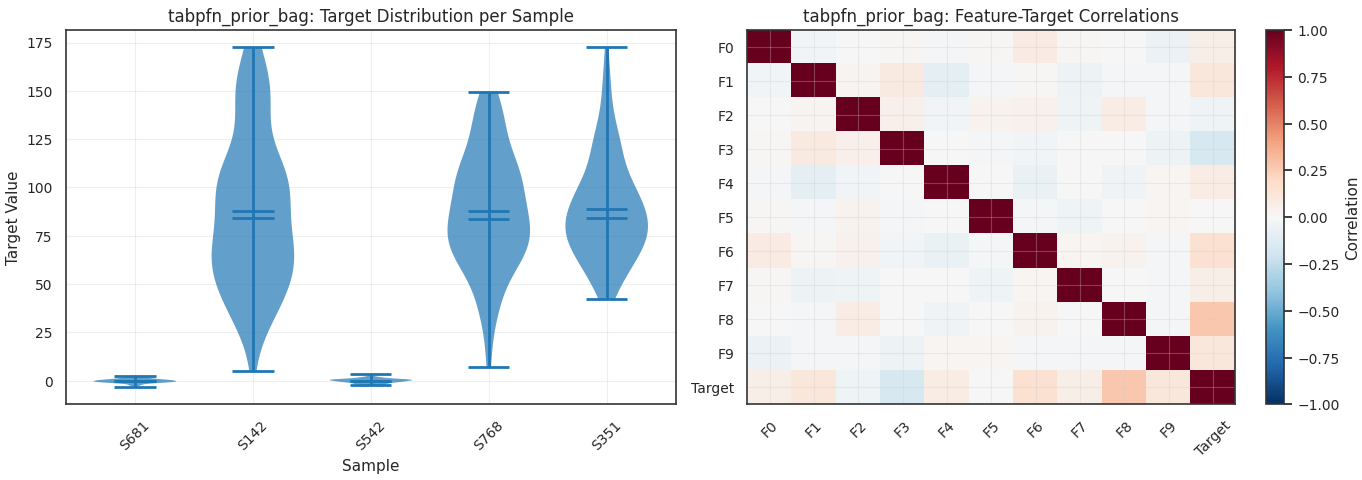


Prior: tabpfn_gp


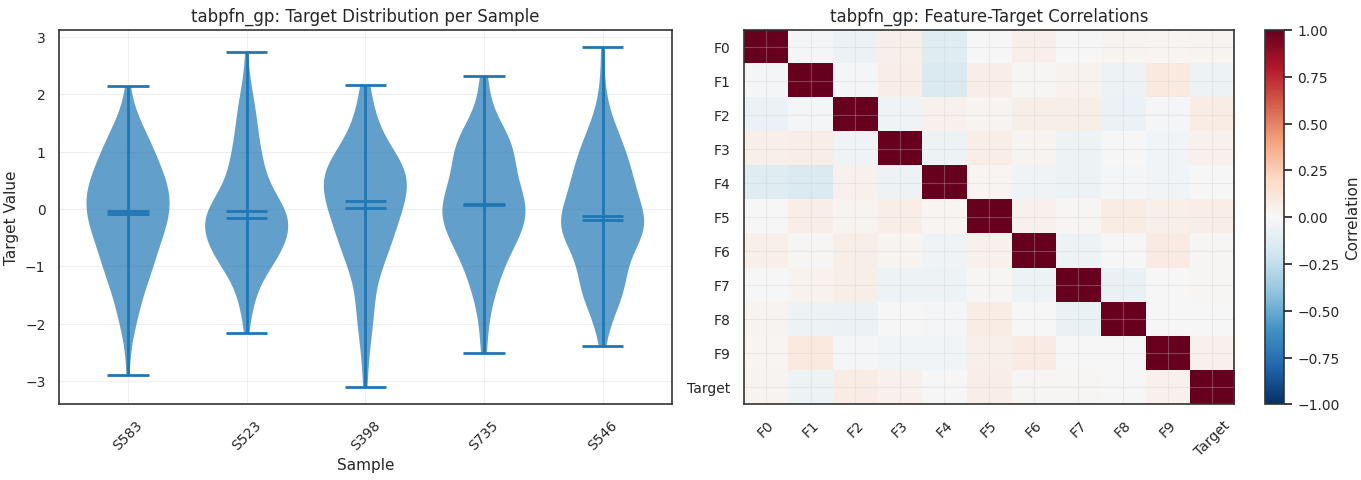


Prior: tabpfn_mlp


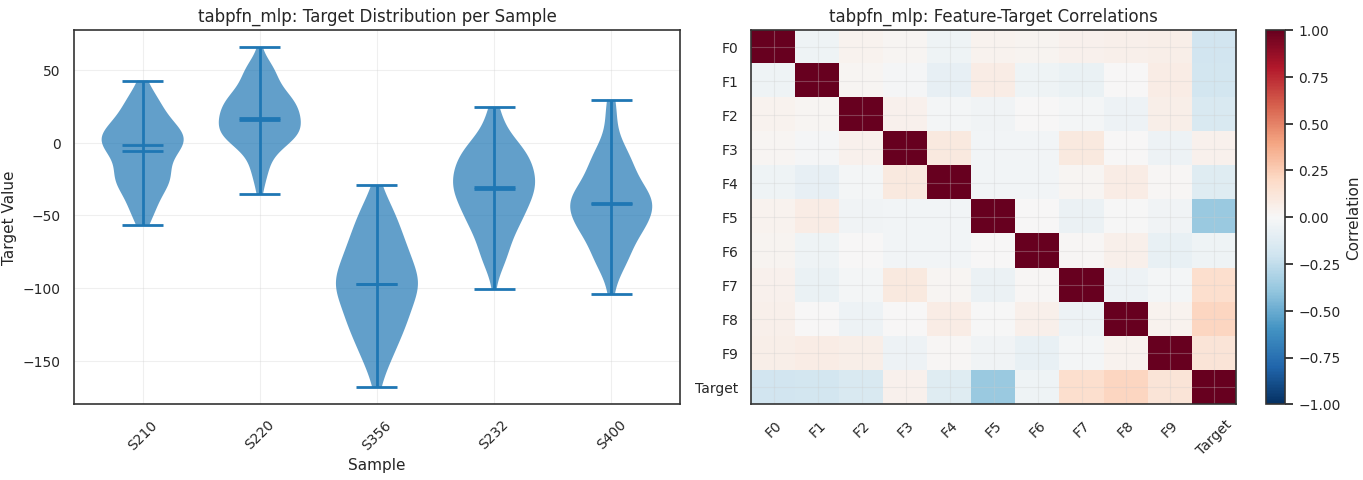


Prior: ticl_mlp


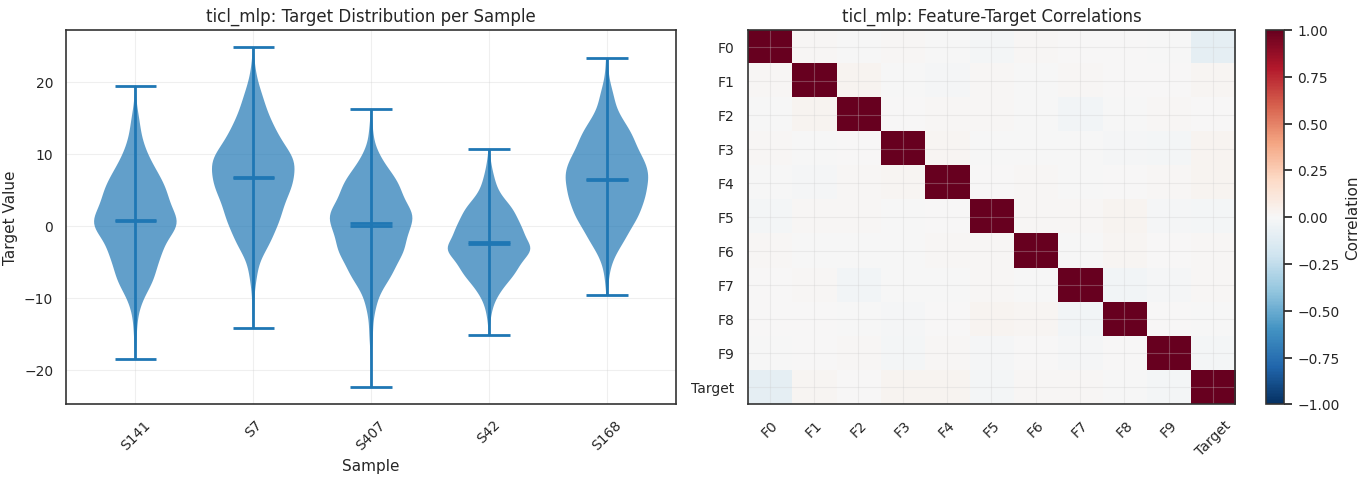


Prior: ticl_gp


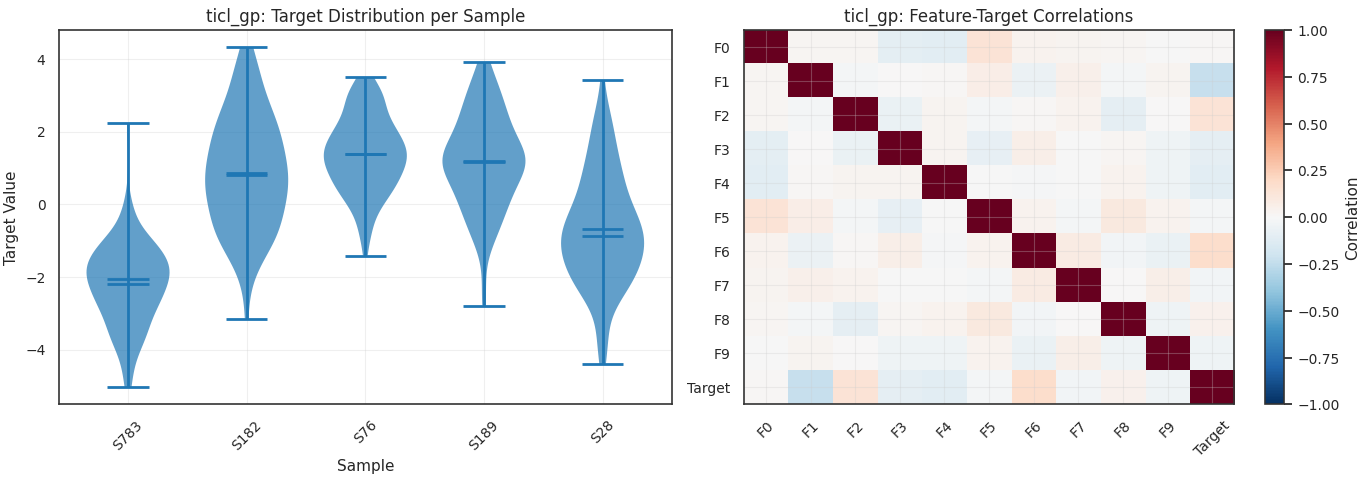

In [3]:
# Plot function samples for each prior
for prior_name, analyzer in analyzers.items():
    print(f"\n{'='*60}")
    print(f"Prior: {prior_name}")
    print(f"{'='*60}")
    
    fig, axes = plot_function_samples(analyzer, prior_name, n_samples=5)
    plt.show()

## 1.2 Comprehensive Prior Overview

A 6-panel view showing multiple aspects of the data:

**Bottom-right (Statistics)**: Summary numbers for quick comparison.

**Top (PCA Projection)**: High-dimensional features reduced to 2D using PCA. Each point is a data instance, colored by its target value. Shows if there's structure in the feature space related to the target.

- Clustering = features group together for similar targets- Patterns = potential predictive relationship

- Smooth color gradients = continuous relationship between features and target- Dense clouds = many data points

- Random scatter = weak feature-target relationship

**Middle-left (Feature Distributions)**: Box plots showing the distribution of the first 10 features separately. Each box shows the median (center line), quartiles (box edges), and outliers (dots). Helps you see if different features have different ranges or if some features are more variable than others.

**Middle-right (Target Distribution)**: Histogram of all target values. Red/orange lines show mean and median. Compare spread (std), skewness, and range between priors.

**Bottom-left (Feature 0 vs Target)**: Scatter plot showing relationship between first feature and target.


Prior: tabpfn_prior_bag - Comprehensive Overview


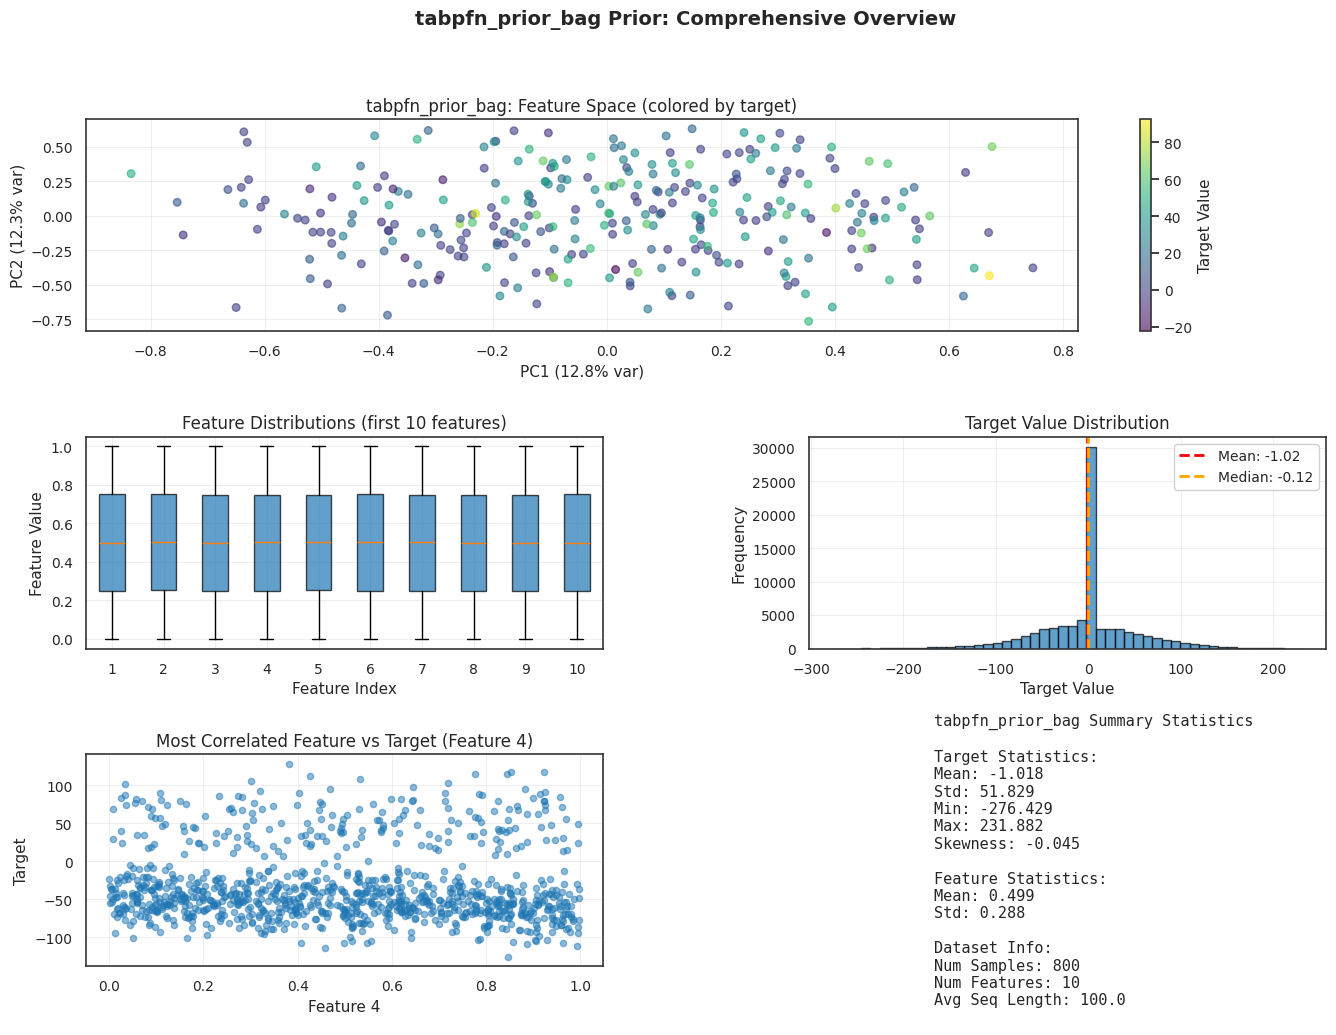


Prior: tabpfn_gp - Comprehensive Overview


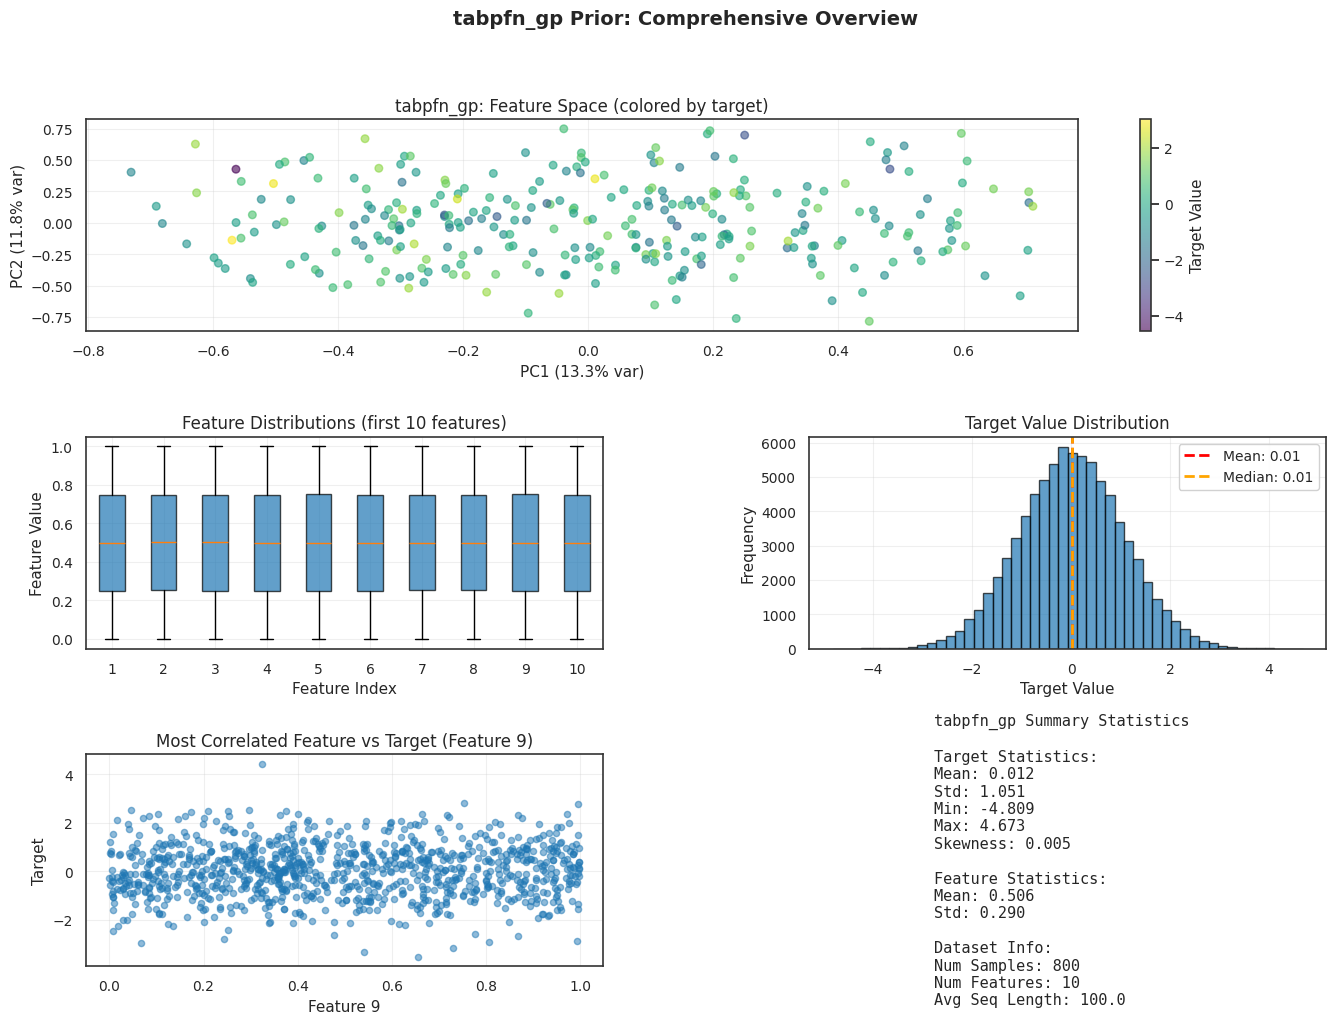


Prior: tabpfn_mlp - Comprehensive Overview


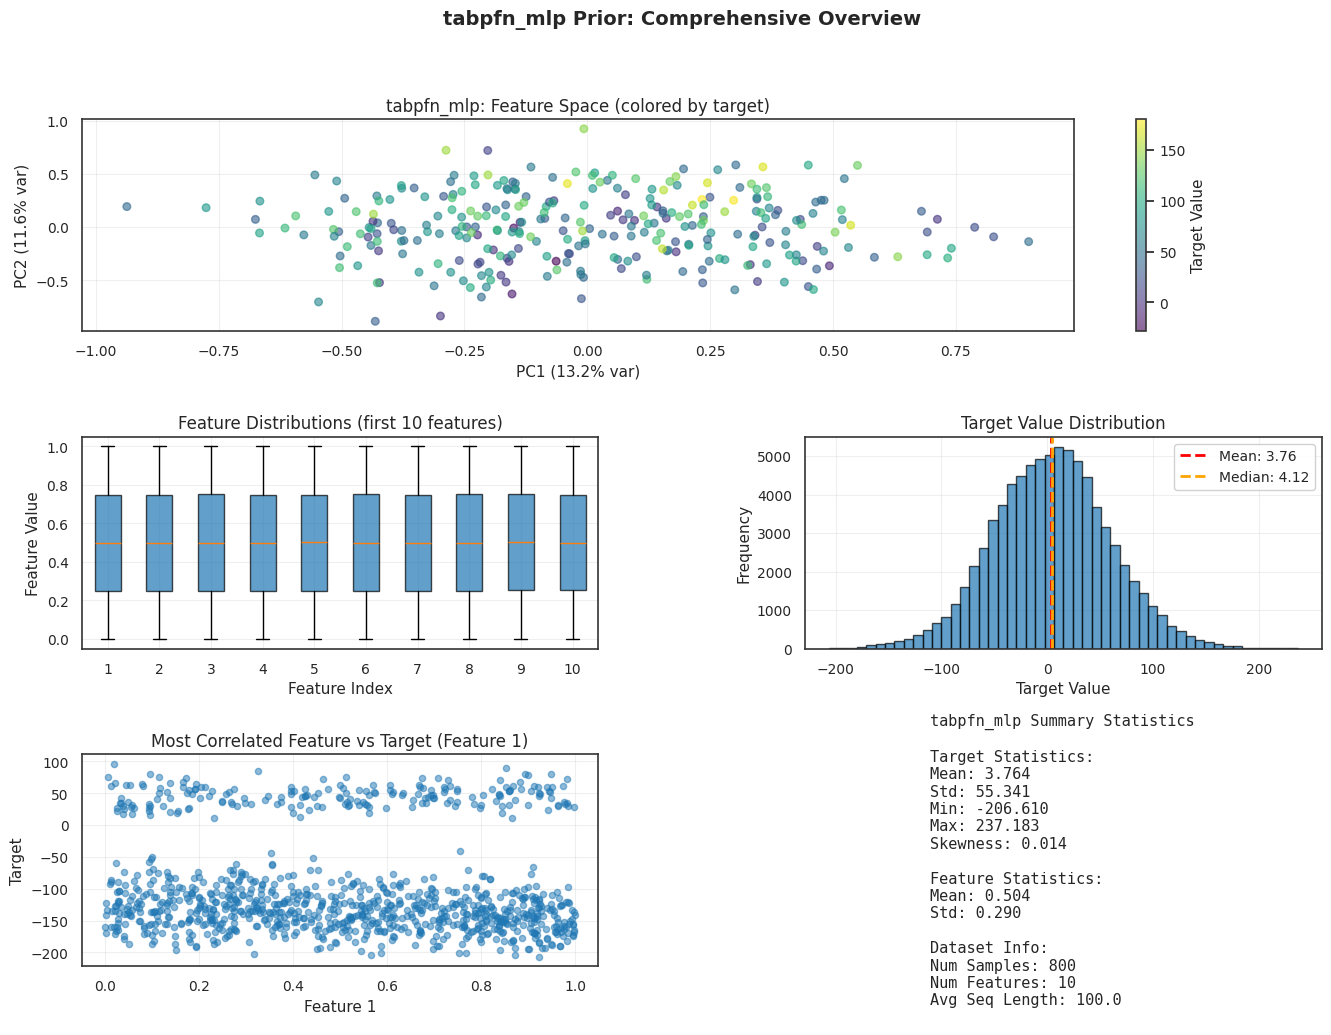


Prior: ticl_mlp - Comprehensive Overview


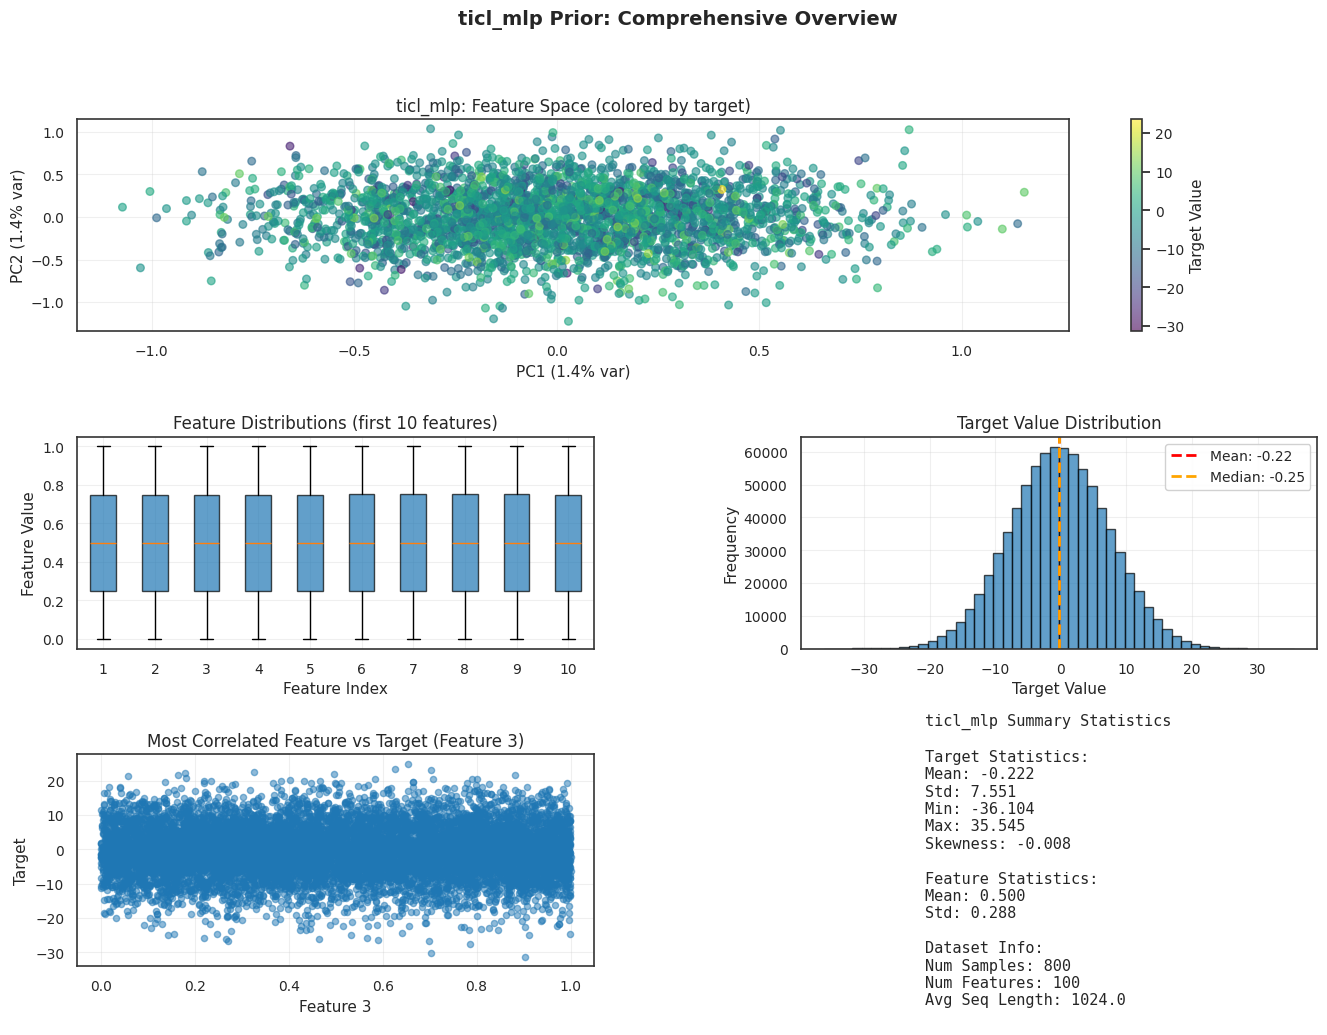


Prior: ticl_gp - Comprehensive Overview


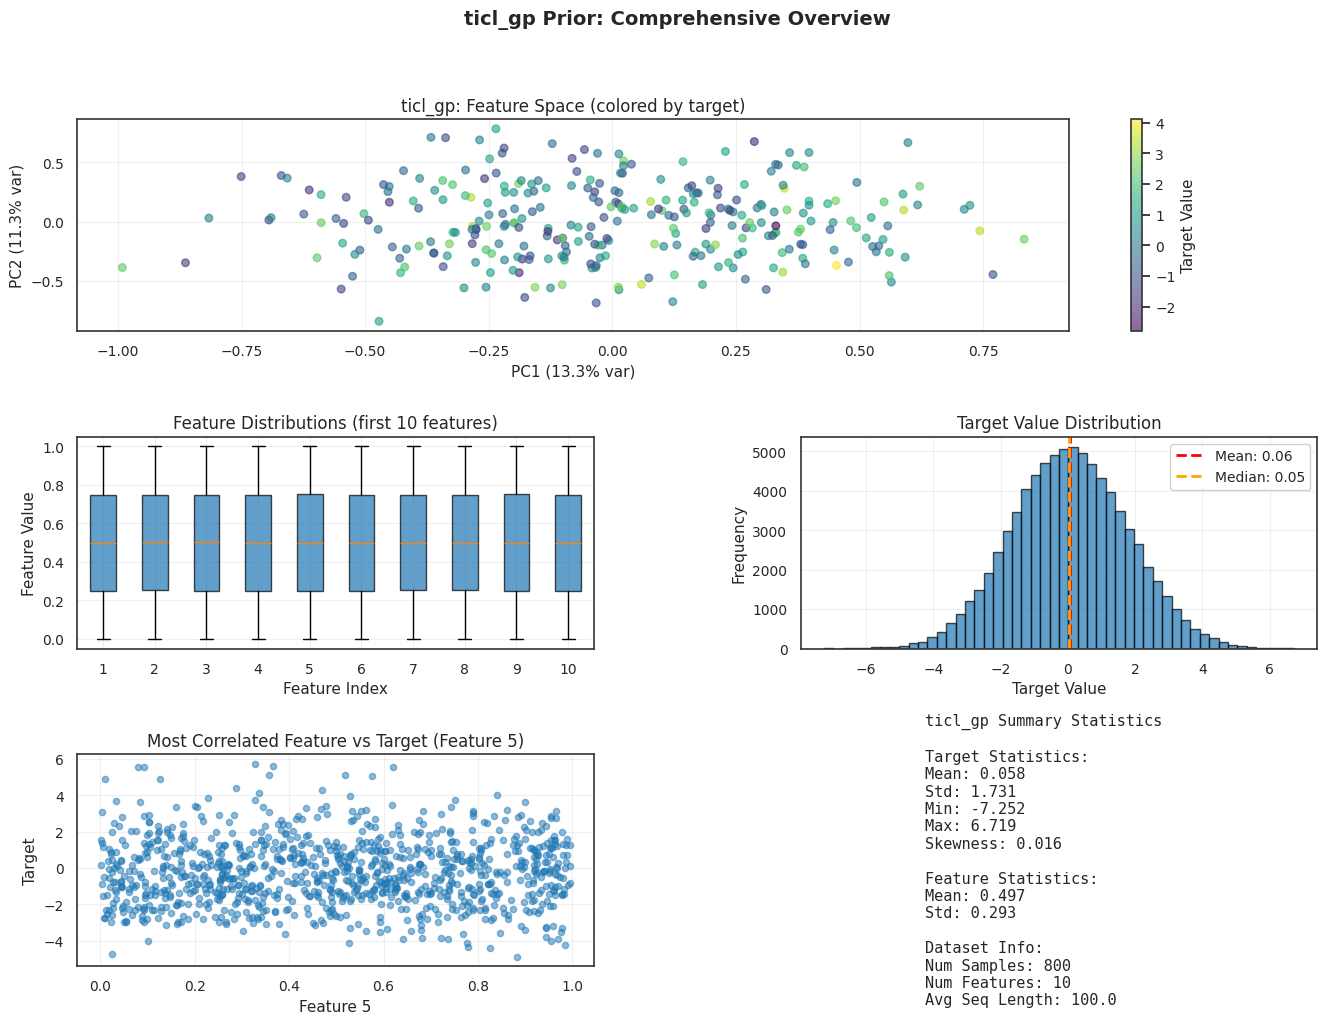

In [4]:
# Comprehensive overview for each prior
for prior_name, analyzer in analyzers.items():
    print(f"\n{'='*60}")
    print(f"Prior: {prior_name} - Comprehensive Overview")
    print(f"{'='*60}")
    
    fig, axes = plot_single_prior_overview(analyzer, prior_name, n_samples=3)
    plt.show()

## 1.3 2D Feature Space Heatmaps (for multi-feature priors)

**What you're looking at:**

When your data has 2+ features, this plots Feature 0 vs Feature 1 for a single sample, with each point colored by its target value.- Clear color transitions = predictive feature interactions

- Uniform random scatter = target is independent of these feature combinations

**What to look for:**- Color gradients or patterns indicate relationships between these two features and the target


Prior: tabpfn_prior_bag - 2D Feature Space


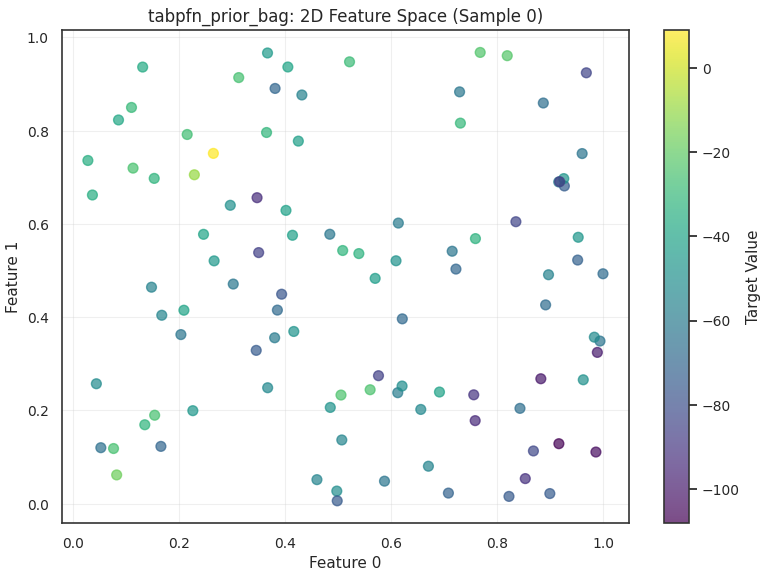


Prior: tabpfn_gp - 2D Feature Space


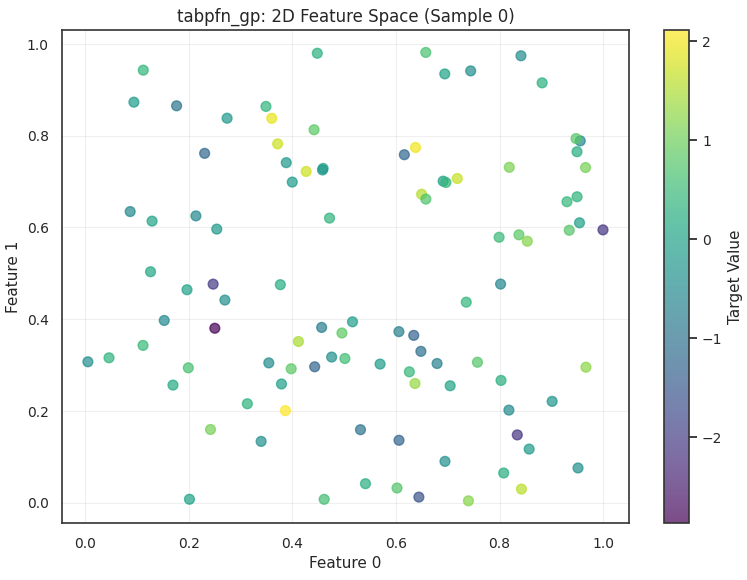


Prior: tabpfn_mlp - 2D Feature Space


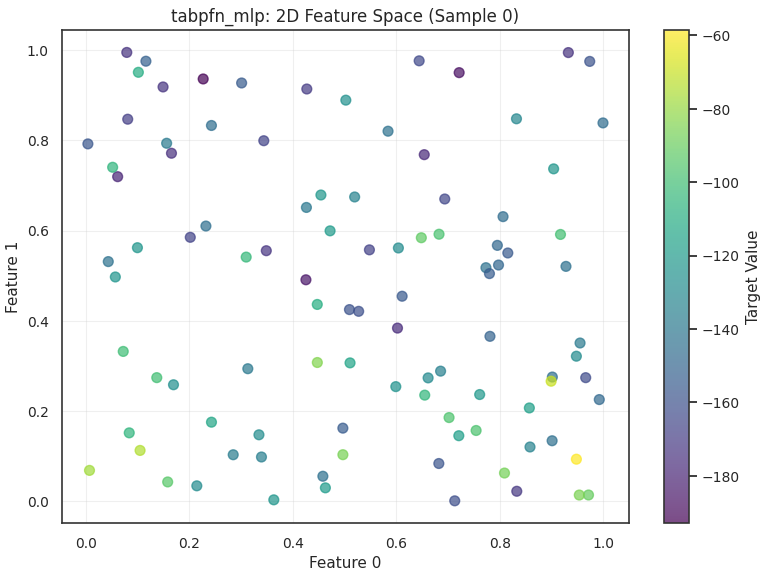


Prior: ticl_mlp - 2D Feature Space


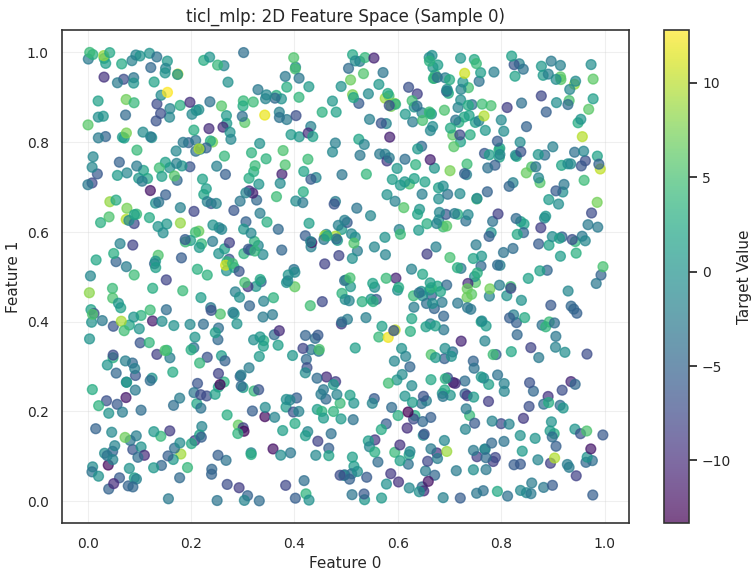


Prior: ticl_gp - 2D Feature Space


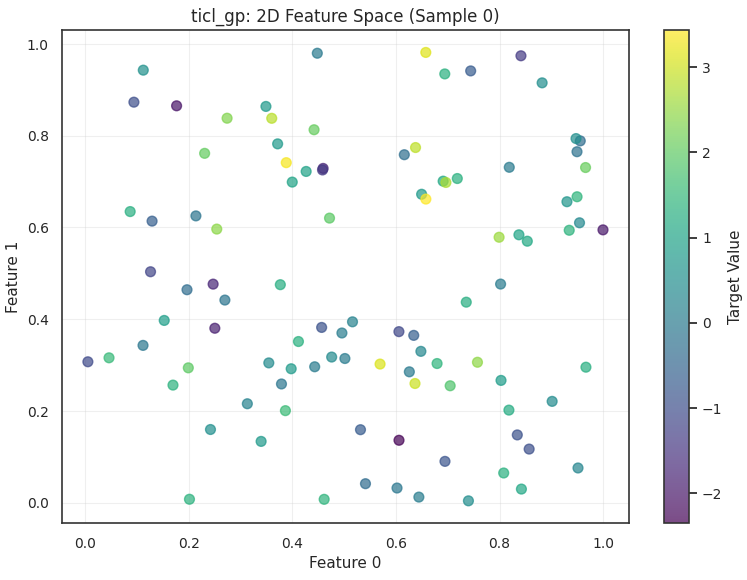

In [5]:
# 2D heatmaps for priors with multiple features
for prior_name, analyzer in analyzers.items():
    # Check if prior has multiple features
    data = analyzer.data
    if data['num_features'][0] >= 2:
        print(f"\n{'='*60}")
        print(f"Prior: {prior_name} - 2D Feature Space")
        print(f"{'='*60}")
        
        # Plot first sample
        fig, ax = plot_2d_heatmap(analyzer, prior_name, sample_idx=0)
        plt.show()

---

# Part 2: Statistical Comparison Across Priors

Compare different regression priors using statistical metrics and distributions.

## 2.1 Target Distributions

**What you're looking at:**

- **Left (KDE)**: Smoothed probability density curves showing the distribution shape for each prior- Identify outliers in the box plots

- **Right (Box plots)**: Shows median (orange line), quartiles (box), and outliers (circles) for each prior- Look for skewness or multiple peaks

- Compare peak heights and positions (mean/mode)

**What to look for:**- Compare the width/spread of distributions (variance)

Comparing target distributions across all priors...


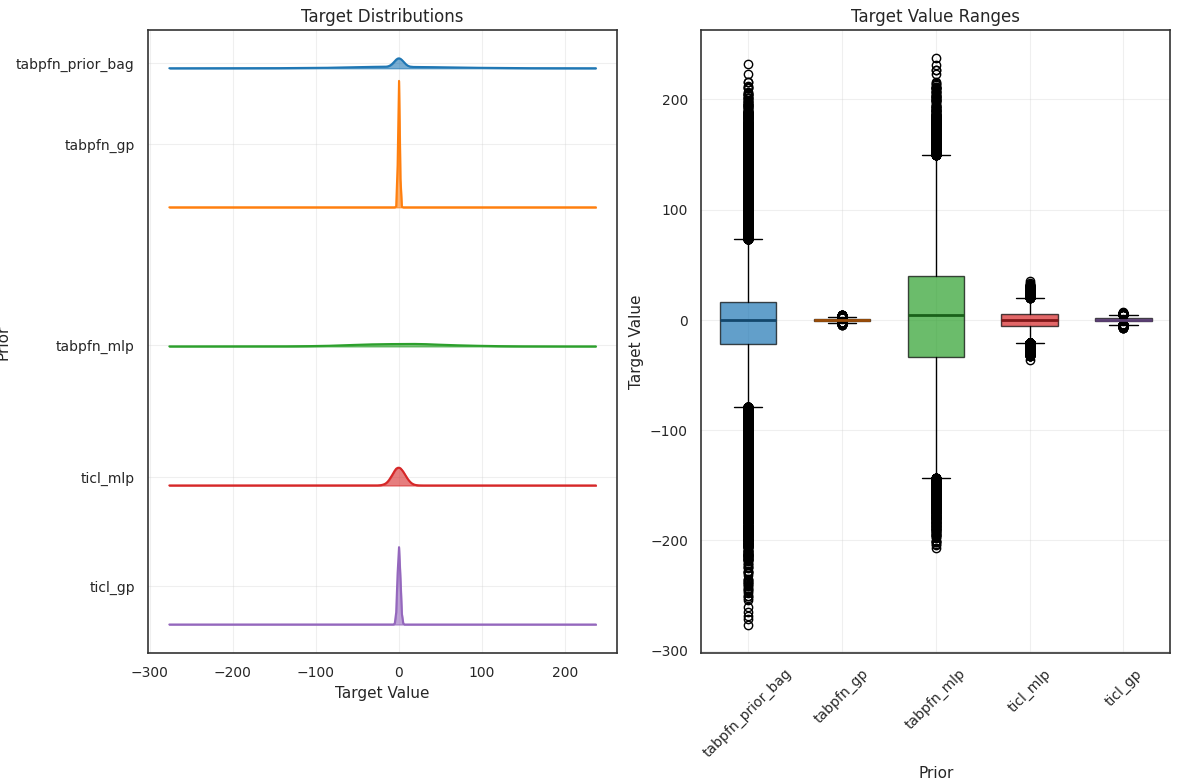

In [6]:
if len(analyzers) > 1:
    print("Comparing target distributions across all priors...")
    fig, axes = plot_target_distributions(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.2 Feature-Target Correlation Strength

**What you're looking at:**

- **Left (Violin Plot)**: Distribution of absolute correlations between each feature and the target. Shows how predictive individual features are. Wider sections = more features with that correlation strength.

- **Right (Mean Bar Chart)**: Average correlation strength across all features. Higher bars = features are more predictive of targets on average.

**What to look for:**
- Higher correlations mean features have stronger linear relationships with targets
- Different priors may have different correlation patterns even with identical feature distributions
- This reveals how each prior generates the feature-target relationship

Comparing feature-target correlations...


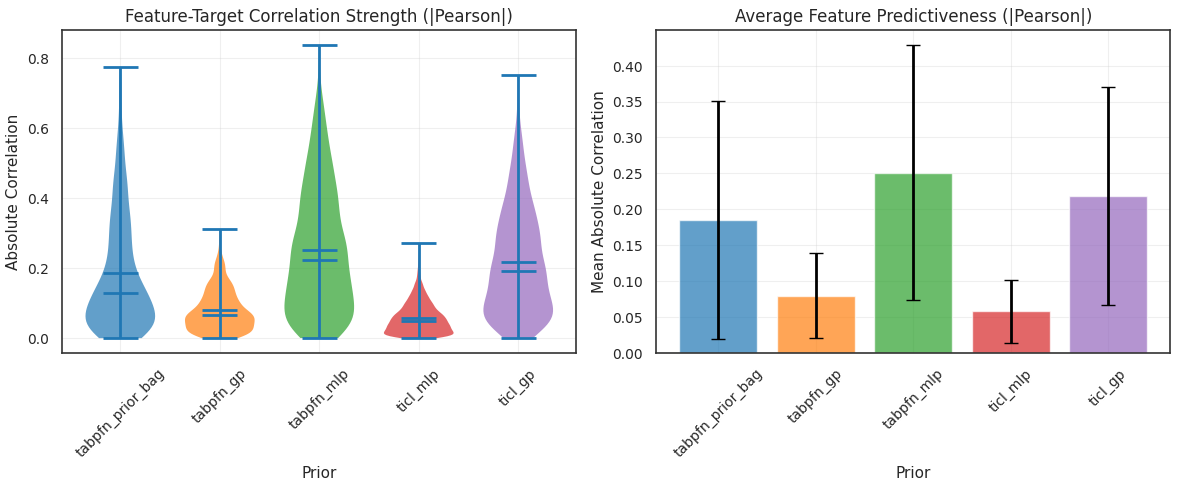

In [7]:
if len(analyzers) > 1:
    print("Comparing feature-target correlations...")
    fig, axes = plot_feature_distributions(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.3 Feature-Target Correlations (Pearson & Spearman)

**What you're looking at:**

- **Left (Pearson)**: Linear correlation between features and targets. Values near ±1 indicate strong linear relationships, near 0 means no linear relationship.
- **Right (Spearman)**: Monotonic correlation (captures any consistent increasing/decreasing relationship, not just linear). Useful for detecting nonlinear but monotonic patterns.

**What to look for:**
- High Pearson but low Spearman: unusual, suggests linear but non-monotonic relationship
- Low Pearson but high Spearman: nonlinear but monotonic relationship (e.g., exponential)
- Both high: strong linear relationship
- Both low: weak or complex relationship between features and targets

Comparing feature-target correlations...


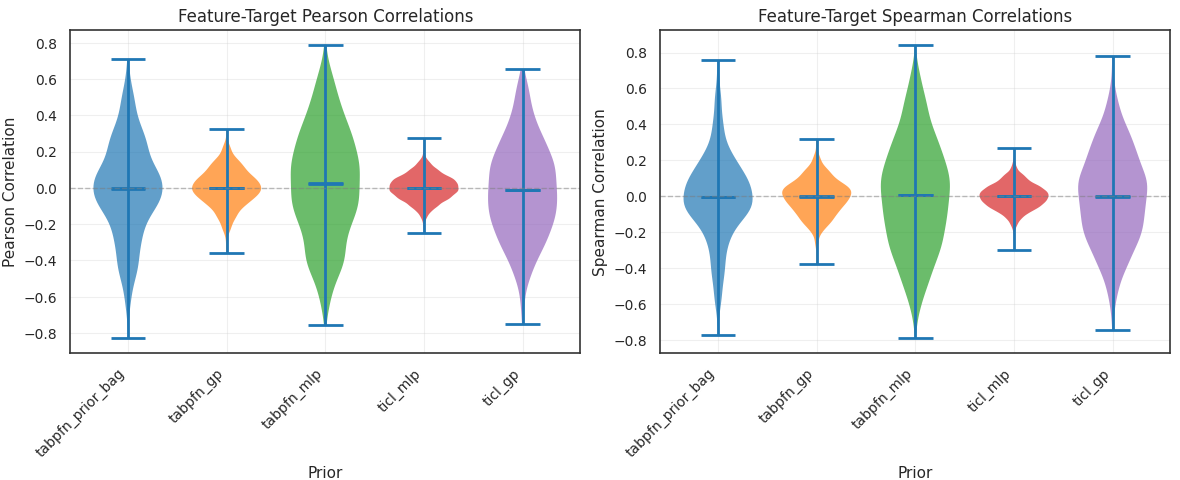

In [8]:
if len(analyzers) > 1:
    print("Comparing feature-target correlations...")
    fig, axes = plot_correlations(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.4 Mutual Information

**What you're looking at:**

- **Left (Distribution)**: Violin plot showing the distribution of mutual information scores between features and targets for each prior.
- **Right (Mean MI)**: Average mutual information with standard deviation bars.

**What to look for:**
- Mutual information captures both linear AND nonlinear dependencies (unlike correlation)
- Higher MI = features contain more information about the target
- Compare to correlation plots: high MI but low correlation suggests nonlinear relationships
- Different priors may generate different levels of feature informativeness

Comparing mutual information...


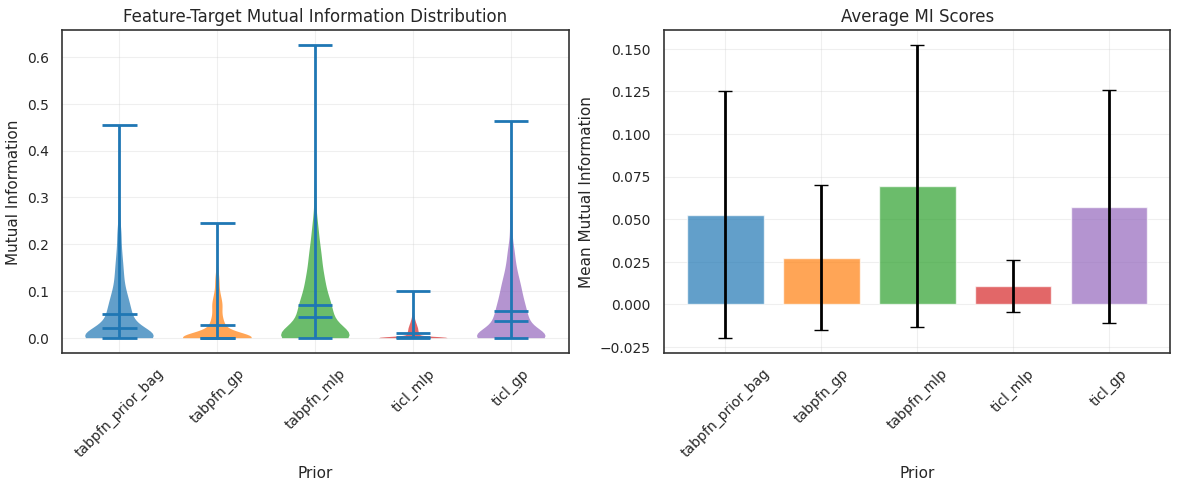

In [9]:
if len(analyzers) > 1:
    print("Comparing mutual information...")
    fig, axes = plot_mutual_info(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.5 Target Complexity and Distribution Characteristics

**What you're looking at:**

- **Top-left (Variance)**: How much targets vary within each prior
- **Top-right (Range)**: Min to max spread of target values
- **Bottom-left (Coefficient of Variation)**: Relative variability (std/mean) - higher means more variable relative to the mean
- **Bottom-right (Skewness)**: Distribution asymmetry - positive = right-skewed, negative = left-skewed, 0 = symmetric

**What to look for:**
- High variance/range priors generate more diverse target values
- Coefficient of variation shows if variability scales with magnitude
- Skewness reveals if distributions are balanced or have heavy tails in one direction

Comparing complexity and noise characteristics...


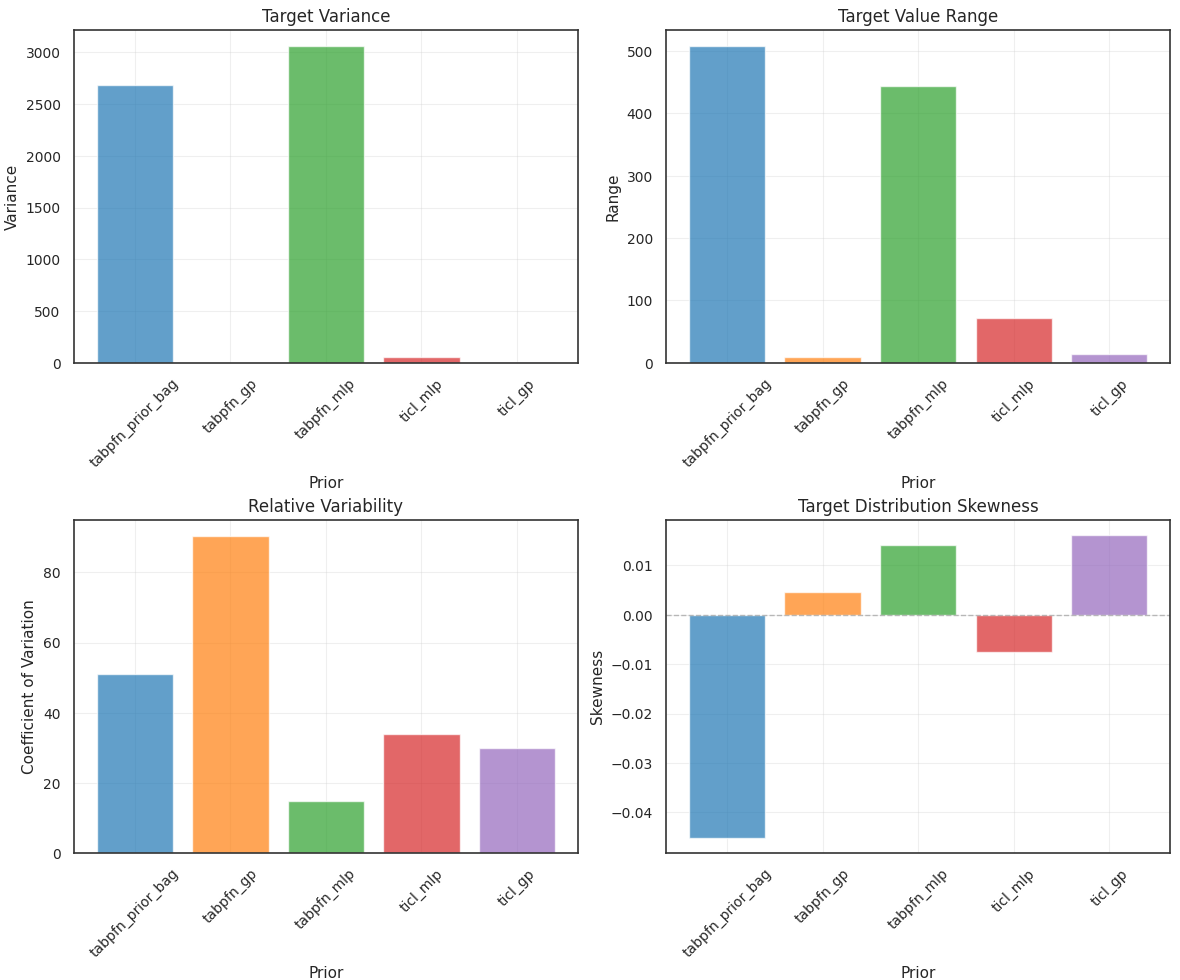

In [10]:
if len(analyzers) > 1:
    print("Comparing complexity and noise characteristics...")
    fig, axes = plot_complexity_noise(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.6 Feature Redundancy

**What you're looking at:**

- **First N plots (Heatmaps)**: Inter-feature correlation matrices for each prior. Red = positive correlation, blue = negative, white = no correlation.
- **Last plot (Summary)**: Mean absolute correlation between features across priors.

**What to look for:**
- Strong correlations (dark red/blue in heatmaps) indicate redundant features
- Low mean correlation = features are independent (good for some models, may indicate less redundancy)
- High correlation = features share information (potential for dimensionality reduction)
- Compare patterns between priors to see different feature generation strategies

Analyzing feature redundancy...


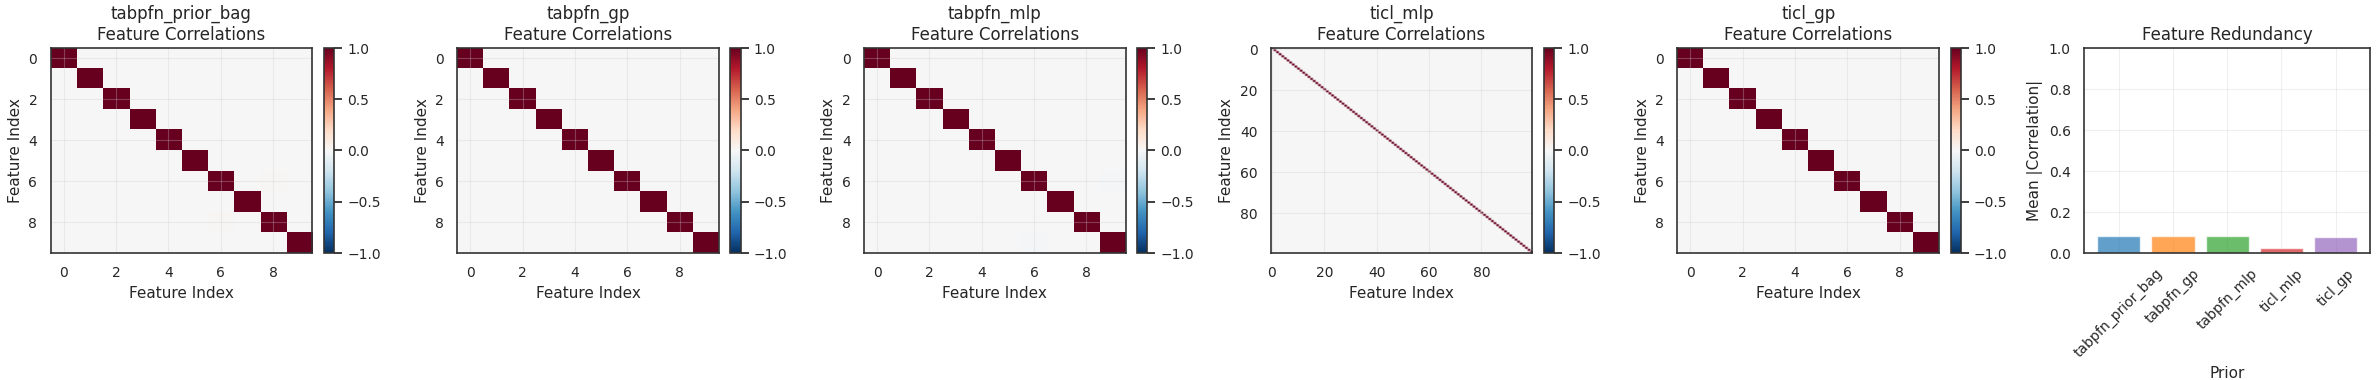

In [11]:
if len(analyzers) > 1:
    print("Analyzing feature redundancy...")
    fig, axes = plot_redundancy(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.7 Prior Similarity

**What you're looking at:**

- **One heatmap:** Each cell `(i, j)` is the correlation between two priors’ **summary vectors**.  
- Each summary vector compresses a prior into a few scalars:
  - Dimensionality (#features, seq length, eval position)
  - Target stats (mean, std, range, skew)
  - Feature stats (mean, std, zero ratio)
  - Feature–target relationships (avg |Pearson|, avg |Spearman|, nonlinearity, informative-feature ratio)
  - Mutual information & redundancy (MI, feature–feature correlations)
  - Noise & linear fit difficulty (noise std, linear R²)

**What to look for:**

- **Red cells (~1):** Priors with **very similar** data characteristics → potentially redundant.  
- **White cells (~0):** No strong similarity in these stats.  
- **Blue cells (< 0):** Priors that differ systematically → good for **diversity**.  
- Look for **clusters of red** to spot families of similar priors and **outliers** that bring unique behavior.

Analyzing similarity between priors...


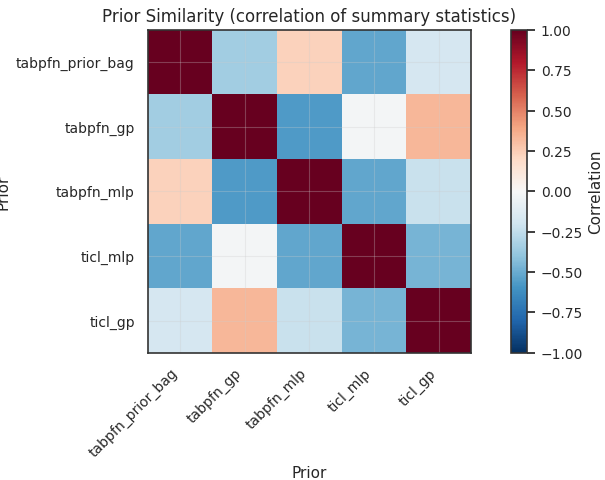

In [12]:
if len(analyzers) > 1:
    print("Analyzing similarity between priors...")
    fig, axes = plot_prior_similarity(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")